In [23]:
#Lendo os dataframes
import pandas as pd
path = 'C:\\Users\\User\\Dropbox (CPI)\\EduardoMinsky\\Dados_Mineracao\\Dados Tabulares\\Dados_Relacionados\\'
#Pegando processos apenas do Pará
mun = pd.read_csv(path+'ProcessoMunicipio.csv')
substancia = pd.read_csv(path+'ProcessoSubstancia.csv')
eventos = pd.read_csv(path+'ProcessoEvento.csv')
processos = pd.read_csv(path+'Processo.csv')
pessoa = pd.read_csv(path+'ProcessoPessoa.csv')

In [24]:
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos333 = eventos.query('IDEvento == 333')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Merge entre processos ativos e processos de evento 333:
processos333_ativos = prceossos_ativos.merge(eventos333,how='inner',on='DSProcesso')
#Transformando o campo de data do evento333 em datetime
processos333_ativos['Data'] = pd.to_datetime(processos333_ativos.DTEvento).dt.year
#Filtrando os processos 333 ativos com a base de ouro:
processos333_ativos_ouro = processos333_ativos[processos333_ativos['DSProcesso'].isin(ouro.DSProcesso)]
#Retirando duplicados:
processos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_333 = mun[mun['DSProcesso'].isin(processos333_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]

#Dando Join com o df processos333_ativos_ouro para plotar o ano com regiao do brasil
join_333_regiao = processos333_ativos_ouro.merge(mun_ouro_ativo_333,on='DSProcesso',how='inner')
join_333_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Transformando a coluna de Area para número!
import numpy as np
join_333_regiao['QTAreaHA'] = join_333_regiao['QTAreaHA'].str.replace(',', '.').astype(float)
join_333_regiao

C:\Users\User\AppData\Local\Temp\ipykernel_4908\2493657228.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4908\2493657228.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]


,Unnamed: 0_x,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,...,Unnamed: 0_y,IDEvento,DTEvento,Evento_,Data,Unnamed: 0,IDMunicipio,Municipios,UF,Regiao
1,10544,815.187/2022,815187,2022,S,48066.815187/2022-24,2.0,5,11,48066.0,...,1526270,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214686,4206306,GUABIRUBA,SC,Sul
3,10587,815.188/2022,815188,2022,S,48066.815188/2022-79,2.0,5,11,48066.0,...,1526692,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214745,4206306,GUABIRUBA,SC,Sul
4,10630,815.189/2022,815189,2022,S,48066.815189/2022-13,2.0,5,11,48066.0,...,1527201,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214795,4202909,BRUSQUE,SC,Sul
5,56386,820.434/2007,820434,2007,S,48402.820434/2007-15,2.0,5,2,48402.0,...,2058950,333,2007-07-05,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2007,271133,3523305,ITARIRI,SP,Sudeste
6,65703,820.657/2006,820657,2006,S,48402.820657/2006-93,2.0,5,2,48402.0,...,2172757,333,2006-09-27,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2006,282792,3523305,ITARIRI,SP,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,842873,806.127/2015,806127,2015,S,48422.806127/2015-95,24.0,6,22,48422.0,...,820903,333,2015-09-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2015,115989,2112407,TURIAÇU,MA,Nordeste
19040,843322,806.146/2021,806146,2021,S,48078.806146/2021-27,2.0,5,22,48078.0,...,826075,333,2021-11-17,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116533,2103158,CENTRO DO GUILHERME,MA,Nordeste
19041,843502,806.155/2021,806155,2021,S,48078.806155/2021-18,2.0,5,22,48078.0,...,827764,333,2021-12-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116744,2103158,CENTRO DO GUILHERME,MA,Nordeste
19042,843697,806.165/2021,806165,2021,S,48078.806165/2021-53,2.0,5,22,48078.0,...,829788,333,2021-12-13,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116978,2103174,CENTRO NOVO DO MARANHÃO,MA,Nordeste


In [25]:
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos513 = eventos.query('IDEvento == 513')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Merge entre processos ativos e processos de evento 333:
processos513_ativos = prceossos_ativos.merge(eventos513,how='inner',on='DSProcesso')
#Transformando o campo de data do evento513 em datetime
processos513_ativos['Data'] = pd.to_datetime(processos513_ativos.DTEvento).dt.year
#Filtrando os processos 513 ativos com a base de ouro:
processos513_ativos_ouro = processos513_ativos[processos513_ativos['DSProcesso'].isin(ouro.DSProcesso)]
#Retirando duplicados:
processos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_513 = mun[mun['DSProcesso'].isin(processos513_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]

#Dando Join com o df processos333_ativos_ouro para plotar o ano com regiao do brasil
join_513_regiao = processos513_ativos_ouro.merge(mun_ouro_ativo_513,on='DSProcesso',how='inner')
join_513_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Transformando a coluna de Area para número!
import numpy as np
join_513_regiao['QTAreaHA'] = join_513_regiao['QTAreaHA'].str.replace(',', '.').astype(float)
full_join = join_513_regiao.merge(join_333_regiao,how='inner',on='DSProcesso')


C:\Users\User\AppData\Local\Temp\ipykernel_4908\807547001.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4908\807547001.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]


In [73]:
#Calculando Q90 
columns_keep = ['DSProcesso','QTAreaHA_x','IDEvento_x','Evento__x','Regiao_x','UF_x','Municipios_x','Data_x','QTAreaHA_y','IDEvento_y','Evento__y',
               'Data_y']
df_clean = full_join[columns_keep]
para = df_clean.query('UF_x=="PA"')
mt = df_clean.query('UF_x=="MT"')


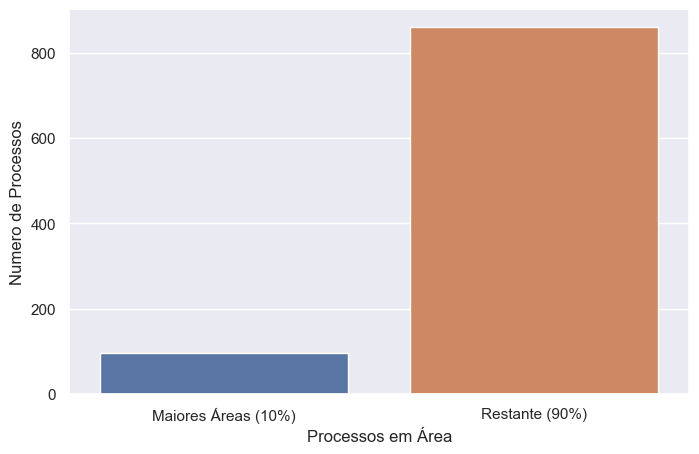

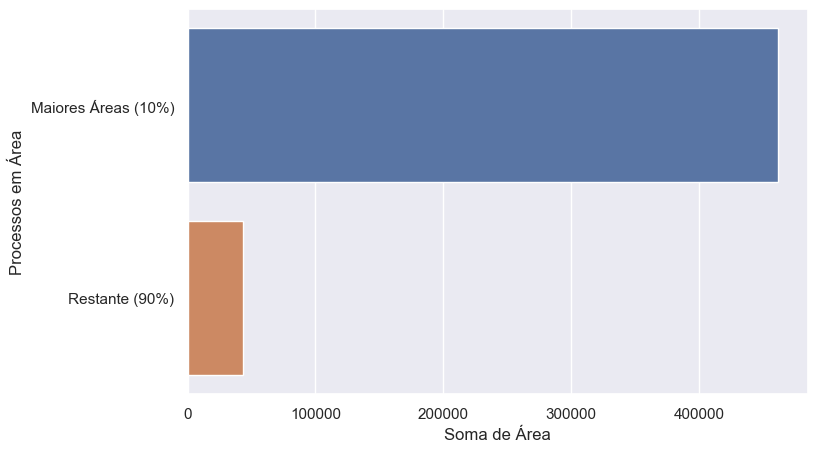

In [118]:
#Pegando os top 10%  e bottom 90% de area para processo do MT
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(8, 5)})
import numpy as np
np.quantile(mt['QTAreaHA_x'],0.90)#502.7080000000004
top10_mt = mt[mt['QTAreaHA_x'] > 502.7080000000004]
bottom_90mt = mt[mt['QTAreaHA_x'] < 502.7080000000004]
top10_mt.shape[0]
bottom_90mt.shape[0]

#Criando Dataframe para Quantidade de Processos para MT
d = {'Numero de Processos': [top10_mt.shape[0],bottom_90mt.shape[0]], 'Processos em Área': ['Maiores Áreas (10%)', 'Restante (90%)']}
df_pedido = pd.DataFrame(data=d)


sns.barplot(data=df_pedido, x="Processos em Área", y="Numero de Processos")
plt.show()

w = {'Soma de Área': [top10_mt.QTAreaHA_x.sum(),bottom_90mt.QTAreaHA_x.sum()], 'Processos em Área': ['Maiores Áreas (10%)', 'Restante (90%)']}
df_area = pd.DataFrame(data=w)
sns.barplot(data=df_area, x="Soma de Área", y="Processos em Área")
plt.show()

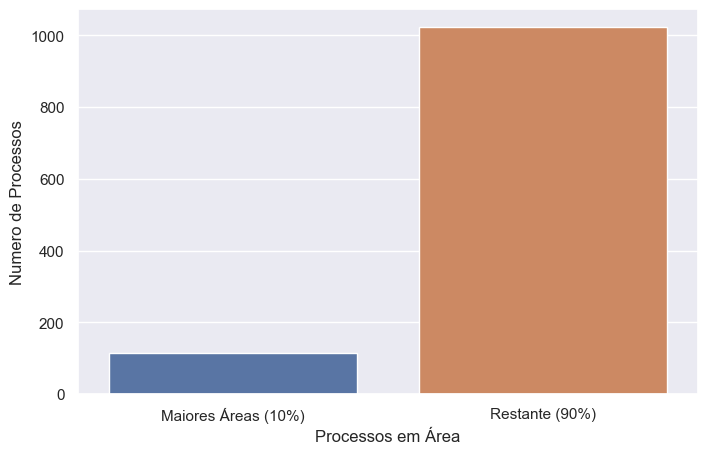

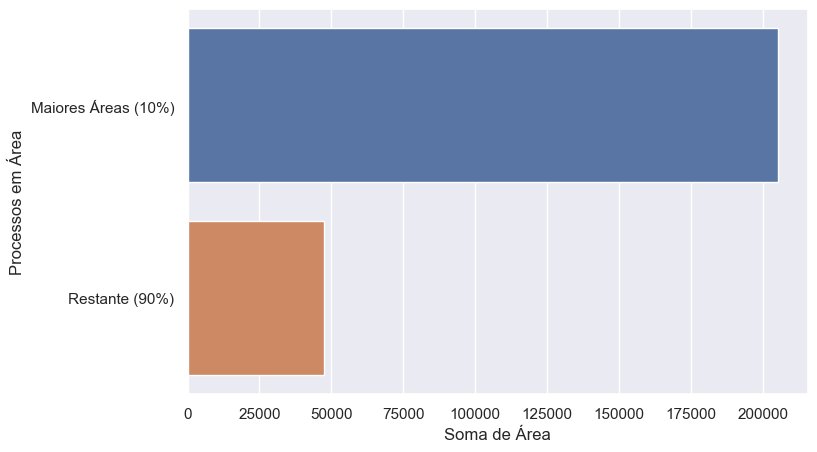

In [120]:
#Pegando os top 10%  e bottom 90% de area para processo do PA
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(8, 5)})
import numpy as np
np.quantile(para['QTAreaHA_x'],0.90)#70.57
top10_pa = para[para['QTAreaHA_x'] > 70.57]
bottom_90pa = para[para['QTAreaHA_x'] < 70.57]
top10_pa.shape[0]
bottom_90pa.shape[0]

#Criando Dataframe para Quantidade de Processos para MT
d = {'Numero de Processos': [top10_pa.shape[0],bottom_90pa.shape[0]], 'Processos em Área': ['Maiores Áreas (10%)', 'Restante (90%)']}
df_pedido = pd.DataFrame(data=d)


sns.barplot(data=df_pedido, x="Processos em Área", y="Numero de Processos")
plt.show()

w = {'Soma de Área': [top10_pa.QTAreaHA_x.sum(),bottom_90pa.QTAreaHA_x.sum()], 'Processos em Área': ['Maiores Áreas (10%)', 'Restante (90%)']}
df_area = pd.DataFrame(data=w)
sns.barplot(data=df_area, x="Soma de Área", y="Processos em Área")
plt.show()


## Analise Específica para o Para
- desde 19 de fevereiro de 2021; e

- com área menor ou igual a 500 hectares; e

In [125]:
#Loading packages
import pandas as pd

para = mun.query('UF=="PA"')

ouro = substancia.query('Substancia.str.contains("OURO")',engine='python')
#Filtrando no df do Para, quais são para substância ouro, baseado no DF de Ouro
para_ouro = para[para['DSProcesso'].isin(ouro['DSProcesso'])]
#Lendo a planilha de eventos e filtrando para os eventos 333 ou 513:

eventos_333 = eventos.query('IDEvento==333')
eventos_513 = eventos.query("IDEvento==513")

#Lendo a planilha principal de Processos e dando inner join com a planilha de eventos

processos_eventos_333 = processos.merge(eventos_333,how='inner',on='DSProcesso')
processos_eventos_333_513 = processos_eventos_333.merge(eventos_513,how='inner',on='DSProcesso')

#Filtrando os processo em processos_eventos_333_513 que são para o Para e para ouro
processos_eventos_333_513_para_ouro = processos_eventos_333_513[processos_eventos_333_513['DSProcesso'].isin(para_ouro['DSProcesso'])]
processos_eventos_333_513_para_ouro.drop_duplicates('DSProcesso',inplace=True)
#Lendo a planilha de Processos Pessoa e unindo ela ao nosso DF principal

processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro.merge(pessoa,how='inner',on='DSProcesso')
processos_eventos_333_513_para_ouro_pessoa.drop_duplicates('DSProcesso',keep = 'last',inplace=True)
#Passando a coluna de Área para numérico:
processos_eventos_333_513_para_ouro_pessoa['QTAreaHA'] = processos_eventos_333_513_para_ouro_pessoa['QTAreaHA'].str.replace(',', '.').astype(float)
#Criando coluna de Data para o evento 513 e 333
processos_eventos_333_513_para_ouro_pessoa['Evento_513_Date'] = pd.to_datetime(processos_eventos_333_513_para_ouro_pessoa.DTEvento_y)
processos_eventos_333_513_para_ouro_pessoa['Evento_333_Date'] = pd.to_datetime(processos_eventos_333_513_para_ouro_pessoa.DTEvento_x)
#Selecionando as colunas que queremos:
processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro_pessoa.loc[:,~processos_eventos_333_513_para_ouro_pessoa.columns.duplicated()].copy()
columns_keep = ['DSProcesso','BTAtivo','QTAreaHA','Tipo_Requerimento','IDEvento_x','Evento__x',
                'Evento_333_Date','IDEvento_y','Evento__y','Evento_513_Date','Pessoa','Pessoa_NOME','TipoRelacao']
processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro_pessoa.filter(items = columns_keep).copy()
#Filtrando para os processos que o evento 513 ocorreu no dia 19 de fevereiro de 2021 ou depois
processos_data_apos = processos_eventos_333_513_para_ouro_pessoa[processos_eventos_333_513_para_ouro_pessoa['Evento_513_Date']>= '2021-02-19']


#Filtrando para os processos que o evento 513 ocorreu antes do dia 19 de fevereiro de 2021 ou depois
processos_data_antes = processos_eventos_333_513_para_ouro_pessoa[processos_eventos_333_513_para_ouro_pessoa['Evento_513_Date']< '2021-02-19']


C:\Users\User\AppData\Local\Temp\ipykernel_4908\3992526076.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos_eventos_333_513_para_ouro.drop_duplicates('DSProcesso',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4908\3992526076.py:24: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  processos_eventos_333_513_para_ouro_pessoa = processos_eventos_333_513_para_ouro.merge(pessoa,how='inner',on='DSProcesso')


In [208]:
#criando dataframes dos processos que ocorreram nessa data mas sao menores ou iguais a 500 ha
processos_data_apos_areamenor = processos_data_apos[processos_data_apos['QTAreaHA']<= 500]

#criando dataframes dos processos que ocorreram nessa data mas sao maiores ou iguais a 500 ha
processos_data_apos_areamaior = processos_data_apos[processos_data_apos['QTAreaHA']> 500]



a = processos_data_apos_areamenor.groupby(['Pessoa_NOME','Pessoa'])['QTAreaHA'].sum().to_frame().reset_index()
b = processos_data_apos_areamenor.groupby('Pessoa_NOME')['QTAreaHA'].count().to_frame().reset_index()

c = a.merge(b,how='inner',on='Pessoa_NOME').sort_values('QTAreaHA_x',ascending=False)
c.query('QTAreaHA_x > 500')

,Pessoa_NOME,Pessoa,QTAreaHA_x,QTAreaHA_y
13,COOPERATIVA DE EXTRACAO MINERAL DE NOSSA SENHO...,J,1438.36,4
23,Coogamibra Cooperativa dos Garimpeiros e Miner...,J,965.21,4
36,FIORAVANTE BUOSI,F,685.69,16
43,Guilherme Willi Aggens,F,639.51,7
65,OURO NORTE COOPERATIVA DO GARIMPEIRO LEGAL - CGL,J,549.78,2
